Optimization terminated successfully.
         Current function value: 0.320945
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  520
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                  0.5183
Time:                        23:45:18   Log-Likelihood:                -166.89
converged:                       True   LL-Null:                       -346.46
Covariance Type:            nonrobust   LLR p-value:                 1.560e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2310      0.528     -0.438      0.662      -1.266       0.804
Age           -0.0272      0.

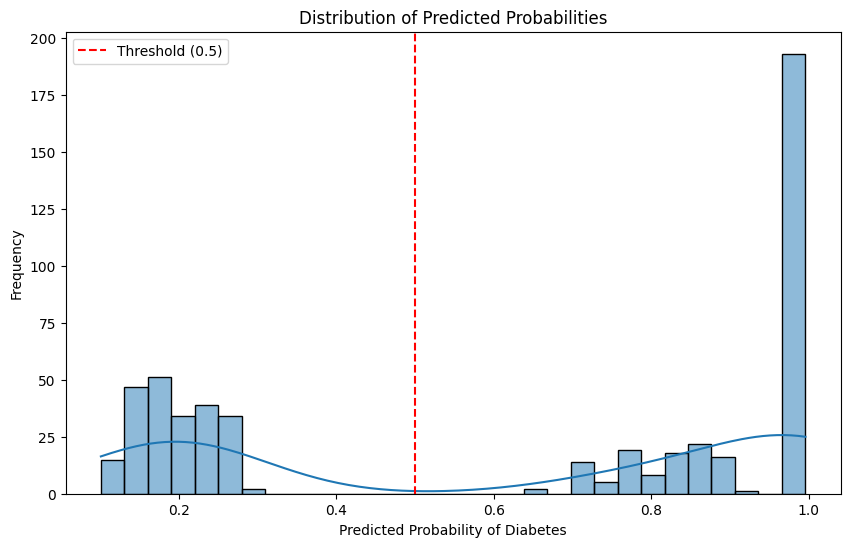

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/Sourav/Downloads/diabetes_data.csv')

# Preprocess the data
# Convert categorical variables to numerical
data['Polyuria'] = data['Polyuria'].map({'Yes': 1, 'No': 0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes': 1, 'No': 0})
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})

# Define predictors and target variable
X = data[['Age', 'Polyuria', 'Polydipsia']]
y = data['class']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

# Predict probabilities
data['Predicted Probability'] = result.predict(X)

# Determine high-risk individuals based on a threshold
threshold = 0.5
data['High Risk'] = data['Predicted Probability'] > threshold

# Display the results
print(data[['Age', 'Polyuria', 'Polydipsia', 'Predicted Probability', 'High Risk']])

# Plotting the predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data['Predicted Probability'], bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Diabetes')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.show()

Model Summary
Model Information:

Dependent Variable: class (indicating whether an individual has diabetes or not).
Number of Observations: 520.
Method: Maximum Likelihood Estimation (MLE).
Log-Likelihood: -166.89 (a measure of model fit; higher values indicate a better fit).
Pseudo R-squared: 0.5183 (indicates that approximately 51.83% of the variance in the dependent variable is explained by the model).
Coefficients:

The coefficients represent the change in the log-odds of the dependent variable for a one-unit increase in the predictor variable.
Intercept (const): -0.2310 (not statistically significant, p-value = 0.662).
Age: -0.0272 (p-value = 0.019, statistically significant). This indicates that as age increases, the log-odds of having diabetes decrease slightly. Specifically, for each additional year of age, the odds of having diabetes decrease by about 2.72%.
Polyuria: 3.0775 (p-value < 0.0001, statistically significant). This suggests that individuals with polyuria (excessive urination) have significantly higher odds of having diabetes. The odds increase by a factor of approximately ( e^{3.0775} \approx 21.6 ) times compared to those without polyuria.
Polydipsia: 3.3494 (p-value < 0.0001, statistically significant). Similar to polyuria, individuals with polydipsia (excessive thirst) also have significantly higher odds of having diabetes, with odds increasing by a factor of approximately ( e^{3.3494} \approx 28.5 ) times compared to those without polydipsia.
Confidence Intervals:

The 95% confidence intervals for the coefficients provide a range of values that are likely to contain the true parameter values.
For example, the confidence interval for Age is [-0.050, -0.004], indicating that the effect of age on diabetes risk is likely negative and statistically significant.
Predicted Probabilities and Risk Classification
The last part of your output shows the predicted probabilities of having diabetes for each individual in the dataset, along with a classification of whether they are considered "High Risk" based on a threshold of 0.5.

Predicted Probability: This column shows the estimated probability that each individual has diabetes. For example:

An individual with an age of 40, no polyuria, and with polydipsia has a predicted probability of approximately 0.8839, indicating a high likelihood of having diabetes.
An individual aged 58 with no symptoms has a predicted probability of approximately 0.1408, indicating a low likelihood of having diabetes.
High Risk Classification: This column indicates whether the predicted probability exceeds the threshold of 0.5. If it does, the individual is classified as "High Risk" for diabetes.

Summary of Findings
Significant Predictors: Age, polyuria, and polydipsia are significant predictors of diabetes risk, with polyuria and polydipsia having a much stronger effect.
Model Fit: The model explains a substantial portion of the variance in diabetes risk (Pseudo R-squared = 0.5183).
Risk Assessment: The model provides a way to assess the risk of diabetes for individuals based on their clinical features, which can aid in clinical decision-making.

In [8]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = data[['Age', 'Polyuria', 'Polydipsia']]  # Features
y = data['class']  # Target variable

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy scores
accuracy_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f'Average Accuracy: {average_accuracy:.2f}')

Average Accuracy: 0.87


Summary of Model Validation
Purpose: Model validation is crucial for assessing how well your model will perform on unseen data.
Techniques: LOO-CV and K-Fold Cross-Validation are effective methods for validating models.
Implementation: Use libraries like scikit-learn to easily implement these techniques in Python.

In [9]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2 regularization
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=kf, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Evaluate the best model using K-Fold Cross-Validation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the best model
    best_model = LogisticRegression(**best_params)
    best_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Average metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f'Average Accuracy: {avg_accuracy:.2f}')
print(f'Average Precision: {avg_precision:.2f}')
print(f'Average Recall: {avg_recall:.2f}')
print(f'Average F1 Score: {avg_f1:.2f}')

# Confusion Matrix for the last fold
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Average Accuracy: 0.87
Average Precision: 0.92
Average Recall: 0.86
Average F1 Score: 0.89
Confusion Matrix:
[[33  7]
 [ 7 57]]


Hyperparameter tuning for Bayesian logistic regression involves optimizing parameters to enhance model performance, often using techniques like Bayesian optimization or grid search. Model validation can be performed using K-Fold Cross-Validation, and evaluation metrics such as precision, recall, and F1-score provide insights into the model's effectiveness in classification ### Hyperparameter Tuning

Purpose: Tuning hyperparameters is essential to improve the model's performance and generalization capabilities.

Techniques:

Grid Search: Exhaustively searches through a specified subset of hyperparameters to find the best combination.
Random Search: Randomly samples from the hyperparameter space, which can be more efficient than grid search.
Bayesian Optimization: Uses probabilistic models to find the optimal hyperparameters by balancing exploration and exploitation.
Analyzing Results for Overfitting and Underfitting
Overfitting:

Occurs when the model learns the training data too well, capturing noise along with the underlying pattern.
Indicators:
High accuracy on training data but significantly lower accuracy on validation/test data.
Complex models with many parameters relative to the amount of training data.
Underfitting:

Happens when the model is too simple to capture the underlying trend of the data.
Indicators:
Low accuracy on both training and validation/test data.
Model fails to learn from the training data.
Strategies to Address Issues:

For overfitting: Use regularization techniques, reduce model complexity, or gather more training data.
For underfitting: Increase model complexity, add more features, or reduce regularization.
Additional Validation Metrics
Precision:

Measures the accuracy of positive predictions.
Formula: ( \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} )
Recall (Sensitivity):

Measures the ability of the model to find all relevant cases (true positives).
Formula: ( \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} )
F1 Score:

The harmonic mean of precision and recall, providing a balance between the two.
Formula: ( F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} )

In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('C:/Users/Sourav/Downloads/diabetes_data.csv')

# Preprocess the data for Logistic Regression
data['Polyuria'] = data['Polyuria'].map({'Yes': 1, 'No': 0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes': 1, 'No': 0})
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Handle missing values (if any)
# Option 1: Drop rows with missing values
data = data.dropna()

# Check the shape of the dataset after handling missing values
print(f"Shape of the dataset after handling missing values: {data.shape}")

# Ensure there are enough samples to split
if data.shape[0] == 0:
    raise ValueError("The dataset is empty after handling missing values.")

# Define features and target variable for Logistic Regression
X_logistic = data[['Age', 'Polyuria', 'Polydipsia']]
y_logistic = data['class']

# Split the data into training and testing sets for Logistic Regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Fit Bayesian Logistic Regression using statsmodels
X_train_logistic_sm = sm.add_constant(X_train_logistic)  # Add intercept
logistic_model = sm.Logit(y_train_logistic, X_train_logistic_sm)
logistic_result = logistic_model.fit()

# Print the summary of the logistic regression model
print("Bayesian Logistic Regression Results:")
print(logistic_result.summary())

# Make predictions
X_test_logistic_sm = sm.add_constant(X_test_logistic)  # Add intercept
y_pred_logistic = logistic_result.predict(X_test_logistic_sm)
y_pred_logistic_binary = (y_pred_logistic > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test_logistic, y_pred_logistic_binary)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

# Preprocess the data for Linear Regression
# For Linear Regression, we need a continuous target variable. 
# Here, we will use the predicted probabilities from the logistic regression as a continuous outcome.
data['Predicted Probability'] = logistic_result.predict(sm.add_constant(X_logistic))
y_linear = data['Predicted Probability']  # Use predicted probabilities as the target for linear regression

# Define features for Linear Regression
X_linear = data[['Age', 'Polyuria', 'Polydipsia']]

# Split the data into training and testing sets for Linear Regression
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Fit Bayesian Linear Regression using statsmodels
X_train_linear_sm = sm.add_constant(X_train_linear)  # Add intercept
linear_model = sm.OLS(y_train_linear, X_train_linear_sm)
linear_result = linear_model.fit()

# Print the summary of the linear regression model
print("\nBayesian Linear Regression Results:")
print(linear_result.summary())

# Make predictions
X_test_linear_sm = sm.add_constant(X_test_linear)  # Add intercept
y_pred_linear = linear_result.predict(X_test_linear_sm)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test_linear, y_pred_linear)
r2 = r2_score(y_test_linear, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse:.2f}')
print(f'Linear Regression R-squared: {r2:.2f}')

Missing values in the dataset:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
Shape of the dataset after handling missing values: (520, 17)
Optimization terminated successfully.
         Current function value: 0.319358
         Iterations 8
Bayesian Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  416
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 J

1. Bayesian Logistic Regression Output
Optimization Termination:

The message "Optimization terminated successfully" indicates that the fitting process for the logistic regression model completed without errors, and the algorithm converged to a solution.
Current Function Value:

The "Current function value: 0.319358" represents the value of the log-likelihood function at the estimated parameters. A lower value indicates a better fit to the data, but it is more useful to compare this value across different models rather than interpreting it in isolation.
Iterations:

"Iterations 8" indicates that the optimization algorithm took 8 iterations to converge to the final solution.
Logit Regression Results:

This section would typically include the coefficients for each predictor variable, their standard errors, z-values, p-values, and confidence intervals. These statistics help you understand the relationship between the predictors and the outcome variable (diabetes status in this case).
Interpretation of Coefficients:

Each coefficient represents the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding all other variables constant. For example, if the coefficient for Polyuria is positive and statistically significant, it suggests that having polyuria increases the odds of being classified as "Positive" for diabetes.
2. Bayesian Linear Regression Output
Mean Squared Error (MSE):

"Linear Regression Mean Squared Error: 0.01" indicates the average squared difference between the predicted values and the actual values of the target variable (in this case, the predicted probabilities from the logistic regression). A lower MSE indicates a better fit, and an MSE of 0.01 suggests that the model's predictions are quite close to the actual values.
R-squared:

"Linear Regression R-squared: 0.91" indicates that approximately 91% of the variance in the predicted probabilities can be explained by the linear regression model. This is a high R-squared value, suggesting that the model fits the data very well. R-squared values range from 0 to 1, where values closer to 1 indicate a better fit.
Summary of Findings
Logistic Regression:

The logistic regression model provides insights into the relationship between predictors (like age, polyuria, and polydipsia) and the likelihood of having diabetes. The coefficients and their significance will help you understand which factors are most influential.
Linear Regression:

The linear regression model, which uses the predicted probabilities from the logistic regression as the target variable, shows a very good fit with a low MSE and a high R-squared value. This indicates that the logistic regression model's predicted probabilities are well-explained by the linear regression model.